In [1]:
#Training RCNN model dengan total 611 gambar dan label sebagai dataset

In [2]:
#Mempersiapkan dataset

In [3]:
import os
import cv2
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
#Setting path images dan csv annotations

In [5]:
path = "images"
annot = "annotations"

In [6]:
#cek file dan annotations

plate_001.jpg


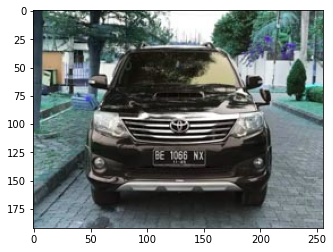

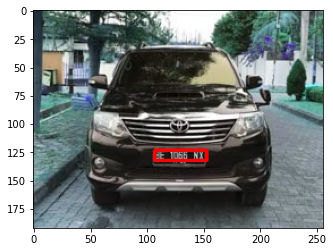

In [7]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [8]:
#menggunakan selective search segmentation

In [9]:
cv2.setUseOptimized(True);
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [10]:
#memperlihatkan contoh dari selective search segmentation

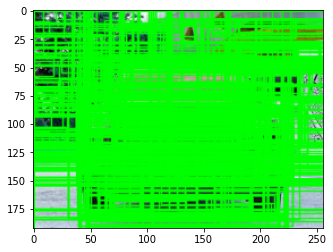

In [11]:
im = cv2.imread(os.path.join(path,"plate_014.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
plt.imshow(imOut)

In [12]:
#mempersiapkan array untuk menampung dataset

In [13]:
train_images=[]
train_labels=[]

In [14]:
#fungsi untuk mendapatkan nilai perpotongan iou (Intersection over Union)

In [15]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])
    if x_right < x_left or y_bottom < y_top:
        return 0.0
    intersection_area = (x_right - x_left) * (y_bottom - y_top)
    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])
    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [16]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [17]:
#memasukan dataset ke dalam array beserta label, annotations, dan potongan images

In [18]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("plate"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 2000 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 plate_001.jpg
1 plate_002.jpg
2 plate_003.jpg
3 plate_004.jpg
4 plate_005.jpg
5 plate_006.jpg
6 plate_007.jpg
7 plate_008.jpg
8 plate_009.jpg
9 plate_010.jpg
10 plate_011.jpg
11 plate_012.jpg
12 plate_013.jpg
13 plate_014.jpg
14 plate_015.jpg
15 plate_016.jpg
16 plate_017.jpg
17 plate_018.jpg
18 plate_019.jpg
19 plate_020.jpg
20 plate_021.jpg
21 plate_022.jpg
22 plate_023.jpg
23 plate_024.jpg
24 plate_025.jpg
25 plate_026.jpg
26 plate_027.jpg
27 plate_028.jpg
28 plate_029.jpg
29 plate_030.jpg
30 plate_031.jpg
31 plate_032.jpg
32 plate_033.jpg
33 plate_034.jpg
34 plate_035.jpg
35 plate_036.jpg
36 plate_037.jpg
37 plate_038.jpg
38 plate_039.jpg
39 plate_040.jpg
40 plate_041.jpg
41 plate_042.jpg
42 plate_043.jpg
43 plate_044.jpg
44 plate_045.jpg
45 plate_046.jpg
46 plate_047.jpg
47 plate_048.jpg
48 plate_049.jpg
49 plate_050.jpg
50 plate_051.jpg
51 plate_052.jpg
52 plate_053.jpg
53 plate_054.jpg
54 plate_055.jpg
55 plate_056.jpg
56 plate_057.jpg
57 plate_058.jpg
58 plate_059.jpg
59 plat

462 plate_463.jpg
463 plate_464.jpg
464 plate_465.jpg
465 plate_466.jpg
466 plate_467.jpg
467 plate_468.jpg
468 plate_469.jpg
469 plate_470.jpg
470 plate_471.jpg
471 plate_472.jpg
472 plate_473.jpg
473 plate_474.jpg
474 plate_475.jpg
475 plate_476.jpg
476 plate_477.jpg
477 plate_478.jpg
478 plate_479.jpg
479 plate_480.jpg
480 plate_481.jpg
481 plate_482.jpg
482 plate_483.jpg
483 plate_484.jpg
484 plate_485.jpg
485 plate_486.jpg
486 plate_487.jpg
487 plate_488.jpg
488 plate_489.jpg
489 plate_490.jpg
490 plate_491.jpg
491 plate_492.jpg
492 plate_493.jpg
493 plate_494.jpg
494 plate_495.jpg
495 plate_496.jpg
496 plate_497.jpg
497 plate_498.jpg
498 plate_499.jpg
499 plate_500.jpg
500 plate_501.jpg
501 plate_502.jpg
502 plate_503.jpg
503 plate_504.jpg
504 plate_505.jpg
505 plate_506.jpg
506 plate_507.jpg
507 plate_508.jpg
508 plate_509.jpg
509 plate_510.jpg
510 plate_511.jpg
511 plate_512.jpg
512 plate_513.jpg
513 plate_514.jpg
514 plate_515.jpg
515 plate_516.jpg
516 plate_517.jpg
517 plate_

In [19]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [20]:
X_new.shape

(18657, 224, 224, 3)

In [21]:
#Training RCNN

In [22]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [23]:
#menggunakan pretrainned vgg16 model

In [24]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [26]:
X= vggmodel.layers[-2].output

In [27]:
#activation = softmax

In [28]:
predictions = Dense(2, activation="softmax")(X)

In [29]:
model_final = Model(vggmodel.input, predictions)

In [30]:
#optimizer = adam

In [31]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

C:\Users\Matthew Brandon Dani\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [32]:
#loss = categorical_crossentropy

In [33]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [34]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [36]:
#fungsi mengubah label menjadi binary

In [37]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [38]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [39]:
#setting test dataset 20% dari training dataset

In [40]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.20)

In [41]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(14925, 224, 224, 3) (3732, 224, 224, 3) (14925, 2) (3732, 2)


In [42]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [43]:
#menggunakan callback untuk membandingkan setiap epoch dan save hanya jika loss epoch lebih kecil

In [44]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [45]:
checkpoint = ModelCheckpoint("rcnnplatemodel.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
#Epoch = 100
#steps per epoch = 10
#validation_steps = 2

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 100, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

In [ ]:
#cek hasil model

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accurary","Validation Accuracy"])
plt.show()